In [1]:
%pip install pycaret
%pip install shap

     |████████████████████████████████| 256kB 2.7MB/s 
     |████████████████████████████████| 174kB 8.6MB/s 
     |████████████████████████████████| 6.8MB 12.2MB/s 
     |████████████████████████████████| 13.9MB 311kB/s 
     |████████████████████████████████| 1.8MB 37.1MB/s 
     |████████████████████████████████| 266kB 44.1MB/s 
     |████████████████████████████████| 1.6MB 44.0MB/s 
     |████████████████████████████████| 66.1MB 54kB/s 
     |████████████████████████████████| 266kB 44.2MB/s 
     |████████████████████████████████| 102kB 10.7MB/s 
     |████████████████████████████████| 1.1MB 47.6MB/s 
     |████████████████████████████████| 6.0MB 47.2MB/s 
     |████████████████████████████████| 153kB 41.6MB/s 
     |████████████████████████████████| 327kB 46.5MB/s 
     |████████████████████████████████| 81kB 7.9MB/s 
     |████████████████████████████████| 51kB 5.6MB/s 
     |████████████████████████████████| 163kB 48.4MB/s 
     |████████████████████████████████| 71kB 7.5MB/s 
 

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from pycaret.regression import *

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [8]:
df = pd.read_csv('/content/2.0 Processed Data with Scaled and Log Transformations.csv', index_col='Unnamed: 0')

In [9]:
pd.set_option('display.max_columns',50)
df = df.drop(['first_cont_after', 'first_order_dt', 'first_cont_dt','order_dt','days_to_donation','rolling_tkt_sum','tot_contribution_paid_amt'], axis=1)
df = df[df.prospect_board == 0]
df = df[df['Lifetime Giving'] < df['Lifetime Giving'].quantile(.97)]
df.head()

,owner_no,tot_ticket_paid_amt,geo_area_desc,Prelim Capacity,ltv_tkt_value,Lifetime Giving,prospect_board,first_cont_order,channel_desc_3rd Party,channel_desc_At the Performance,channel_desc_Chat,channel_desc_Default Channel,channel_desc_Email,channel_desc_Fax,channel_desc_Internal Request,channel_desc_Mail,channel_desc_Mobile,channel_desc_Online,channel_desc_Phone,channel_desc_Telefunding,channel_desc_Walk Up,MOS_desc_External,MOS_desc_Internal,MOS_desc_Ticketing,delivery_desc_Digital,delivery_desc_Do Not Print Tickets,delivery_desc_Mail,delivery_desc_Will Call,facility_desc_Academy of Music,facility_desc_Fundraiser,facility_desc_Independence Mall,facility_desc_Other,facility_desc_Perelman,facility_desc_Small venue
0,111,0.262550,1,5,0.104660,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1,111,0.280947,1,5,0.104660,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
2,111,0.170287,1,5,0.104660,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
3,258,0.290096,5,6,0.014668,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,262,0.110229,2,4,-0.058711,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0


In [10]:
df.shape

(32224, 34)

In [11]:
setup(
    df, 
    target = 'Lifetime Giving',
    train_size = 0.8,
    verbose = True,
    numeric_features = [
        'geo_area_desc',
        'Prelim Capacity'
    ]
)

 
Setup Succesfully Completed.


,Description,Value
0,session_id,6309
1,Transform Target,False
2,Transform Target Method,None
3,Original Data,"(32224, 34)"
4,Missing Values,True
5,Numeric Features,5
6,Categorical Features,28
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


(        owner_no  ...  facility_desc_Small venue_not_available
 0          111.0  ...                                      0.0
 1          111.0  ...                                      0.0
 2          111.0  ...                                      0.0
 3          258.0  ...                                      0.0
 4          262.0  ...                                      0.0
 ...          ...  ...                                      ...
 33963  2347922.0  ...                                      0.0
 33964  2347923.0  ...                                      0.0
 33965  2347924.0  ...                                      0.0
 33966  2347924.0  ...                                      0.0
 33967  2347924.0  ...                                      1.0
 
 [32224 rows x 74 columns], 0        0.000000
 1        0.000000
 2        0.000000
 3        0.000000
 4        0.000000
            ...   
 33963    0.000000
 33964    0.000000
 33965    5.298317
 33966    5.298317
 33967    5.2

In [12]:
model = compare_models(exclude = ['ransac'], sort='MAE',verbose=True, turbo=True)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
0,Decision Tree,0.5577,3.7877,1.9455,0.5260,0.5725,0.2237,0.2131
1,Random Forest,0.6684,1.9260,1.3870,0.7591,0.4894,0.2530,10.4932
2,K Neighbors Regressor,0.7012,3.0350,1.7418,0.6202,0.5762,0.2241,0.3018
3,Extra Trees Regressor,0.7898,2.7382,1.6540,0.6576,0.5619,0.2942,8.6882
4,CatBoost Regressor,1.0123,3.0025,1.7319,0.6245,0.5922,0.4079,8.0597
5,Light Gradient Boosting Machine,1.0866,3.3792,1.8377,0.5774,0.6172,0.4393,0.3653
6,Gradient Boosting Regressor,1.3433,4.6391,2.1534,0.4199,0.7023,0.5285,4.8347
7,Extreme Gradient Boosting,1.3441,4.6567,2.1575,0.4177,0.7031,0.5288,3.2073
8,Support Vector Machine,1.3686,9.4567,3.0746,-0.1817,0.8564,0.9852,36.4631
9,Huber Regressor,1.4743,8.6037,2.9327,-0.0751,0.7844,0.9296,0.6988


In [14]:
model = tune_model(model)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.7589,3.7081,1.9256,0.5390,0.6070,0.3262
1,0.6977,3.2335,1.7982,0.6166,0.5800,0.2703
2,0.7370,3.7140,1.9272,0.5244,0.6018,0.3283
3,0.7246,3.5561,1.8858,0.5542,0.5965,0.3275
4,0.8263,4.0062,2.0015,0.5007,0.6257,0.3492
5,0.6960,3.2514,1.8032,0.5764,0.5890,0.2902
6,0.7417,3.5877,1.8941,0.5510,0.5917,0.3112
7,0.7421,3.3771,1.8377,0.5984,0.5937,0.3151
8,0.6716,3.1809,1.7835,0.5976,0.5712,0.3217
9,0.7301,3.4545,1.8586,0.5537,0.5884,0.3101


In [15]:
predict_model(model)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Decision Tree Regressor,0.7202,3.3859,1.8401,0.5596,0.5883,0.307


,owner_no,tot_ticket_paid_amt,geo_area_desc,Prelim Capacity,ltv_tkt_value,prospect_board_0,first_cont_order_0,first_cont_order_1,channel_desc_3rd Party_0,channel_desc_3rd Party_1,channel_desc_At the Performance_0,channel_desc_At the Performance_1,channel_desc_Chat_0,channel_desc_Chat_1,channel_desc_Default Channel_0,channel_desc_Default Channel_1,channel_desc_Email_0,channel_desc_Email_1,channel_desc_Fax_0,channel_desc_Fax_1,channel_desc_Internal Request_0,channel_desc_Internal Request_1,channel_desc_Mail_0,channel_desc_Mail_1,channel_desc_Mobile_0,channel_desc_Mobile_1,channel_desc_Online_0,channel_desc_Online_1,channel_desc_Phone_0,channel_desc_Phone_1,channel_desc_Telefunding_0,channel_desc_Telefunding_1,channel_desc_Walk Up_0.0,channel_desc_Walk Up_1.0,channel_desc_Walk Up_not_available,MOS_desc_External_0.0,MOS_desc_External_1.0,MOS_desc_External_not_available,MOS_desc_Internal_0.0,MOS_desc_Internal_1.0,MOS_desc_Internal_not_available,MOS_desc_Ticketing_0.0,MOS_desc_Ticketing_1.0,MOS_desc_Ticketing_not_available,delivery_desc_Digital_0.0,delivery_desc_Digital_1.0,delivery_desc_Digital_not_available,delivery_desc_Do Not Print Tickets_0.0,delivery_desc_Do Not Print Tickets_1.0,delivery_desc_Do Not Print Tickets_not_available,delivery_desc_Mail_0.0,delivery_desc_Mail_1.0,delivery_desc_Mail_not_available,delivery_desc_Will Call_0.0,delivery_desc_Will Call_1.0,delivery_desc_Will Call_not_available,facility_desc_Academy of Music_0.0,facility_desc_Academy of Music_1.0,facility_desc_Academy of Music_not_available,facility_desc_Fundraiser_0.0,facility_desc_Fundraiser_1.0,facility_desc_Fundraiser_not_available,facility_desc_Independence Mall_0.0,facility_desc_Independence Mall_1.0,facility_desc_Independence Mall_not_available,facility_desc_Other_0.0,facility_desc_Other_1.0,facility_desc_Other_not_available,facility_desc_Perelman_0.0,facility_desc_Perelman_1.0,facility_desc_Perelman_not_available,facility_desc_Small venue_0.0,facility_desc_Small venue_1.0,facility_desc_Small venue_not_available,Lifetime Giving,Label
0,2204029.0,0.431707,2.0,5.0,0.382520,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,7.824046,7.8240
1,2181233.0,0.195070,1.0,1.0,-0.066746,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.000000,0.0000
2,2342456.0,-0.720197,1.0,0.0,-0.850911,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.000000,0.0000
3,2336406.0,0.347602,2.0,3.0,0.063937,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.000000,0.0000
4,2347402.0,-0.720197,1.0,0.0,-0.850911,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.000000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [17]:
model2 = create_model('rf')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.6987,2.0923,1.4465,0.7399,0.4918,0.2800
1,0.6696,1.8378,1.3557,0.7821,0.4891,0.2256
2,0.6894,2.1023,1.4499,0.7308,0.4964,0.2753
3,0.6810,1.9958,1.4127,0.7498,0.4869,0.2622
4,0.6728,1.9454,1.3948,0.7575,0.4995,0.2471
5,0.6159,1.6312,1.2772,0.7875,0.4731,0.2258
6,0.6839,1.9974,1.4133,0.7500,0.4932,0.2601
7,0.6670,1.8827,1.3721,0.7761,0.4888,0.2487
8,0.6385,1.8286,1.3523,0.7687,0.4789,0.2498
9,0.6667,1.9467,1.3952,0.7485,0.4959,0.2553


In [18]:
model2=tune_model(model2)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,1.0112,3.1982,1.7883,0.6024,0.5888,0.4108
1,0.9747,2.8977,1.7023,0.6564,0.5810,0.3551
2,0.9868,3.0775,1.7543,0.6059,0.5872,0.4069
3,0.9806,3.0846,1.7563,0.6133,0.5858,0.3958
4,0.9652,2.9148,1.7073,0.6367,0.5870,0.3726
5,0.9107,2.5580,1.5994,0.6668,0.5624,0.3634
6,0.9798,3.0138,1.7360,0.6228,0.5829,0.3889
7,0.9695,2.8786,1.6966,0.6577,0.5806,0.3767
8,0.9437,2.7644,1.6627,0.6503,0.5781,0.3832
9,0.9580,2.9536,1.7186,0.6184,0.5887,0.3854


In [19]:
predict_model(model2)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Random Forest Regressor,0.9117,2.7044,1.6445,0.6483,0.5681,0.3696


,owner_no,tot_ticket_paid_amt,geo_area_desc,Prelim Capacity,ltv_tkt_value,prospect_board_0,first_cont_order_0,first_cont_order_1,channel_desc_3rd Party_0,channel_desc_3rd Party_1,channel_desc_At the Performance_0,channel_desc_At the Performance_1,channel_desc_Chat_0,channel_desc_Chat_1,channel_desc_Default Channel_0,channel_desc_Default Channel_1,channel_desc_Email_0,channel_desc_Email_1,channel_desc_Fax_0,channel_desc_Fax_1,channel_desc_Internal Request_0,channel_desc_Internal Request_1,channel_desc_Mail_0,channel_desc_Mail_1,channel_desc_Mobile_0,channel_desc_Mobile_1,channel_desc_Online_0,channel_desc_Online_1,channel_desc_Phone_0,channel_desc_Phone_1,channel_desc_Telefunding_0,channel_desc_Telefunding_1,channel_desc_Walk Up_0.0,channel_desc_Walk Up_1.0,channel_desc_Walk Up_not_available,MOS_desc_External_0.0,MOS_desc_External_1.0,MOS_desc_External_not_available,MOS_desc_Internal_0.0,MOS_desc_Internal_1.0,MOS_desc_Internal_not_available,MOS_desc_Ticketing_0.0,MOS_desc_Ticketing_1.0,MOS_desc_Ticketing_not_available,delivery_desc_Digital_0.0,delivery_desc_Digital_1.0,delivery_desc_Digital_not_available,delivery_desc_Do Not Print Tickets_0.0,delivery_desc_Do Not Print Tickets_1.0,delivery_desc_Do Not Print Tickets_not_available,delivery_desc_Mail_0.0,delivery_desc_Mail_1.0,delivery_desc_Mail_not_available,delivery_desc_Will Call_0.0,delivery_desc_Will Call_1.0,delivery_desc_Will Call_not_available,facility_desc_Academy of Music_0.0,facility_desc_Academy of Music_1.0,facility_desc_Academy of Music_not_available,facility_desc_Fundraiser_0.0,facility_desc_Fundraiser_1.0,facility_desc_Fundraiser_not_available,facility_desc_Independence Mall_0.0,facility_desc_Independence Mall_1.0,facility_desc_Independence Mall_not_available,facility_desc_Other_0.0,facility_desc_Other_1.0,facility_desc_Other_not_available,facility_desc_Perelman_0.0,facility_desc_Perelman_1.0,facility_desc_Perelman_not_available,facility_desc_Small venue_0.0,facility_desc_Small venue_1.0,facility_desc_Small venue_not_available,Lifetime Giving,Label
0,2204029.0,0.431707,2.0,5.0,0.382520,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,7.824046,7.5236
1,2181233.0,0.195070,1.0,1.0,-0.066746,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.000000,0.1410
2,2342456.0,-0.720197,1.0,0.0,-0.850911,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.000000,0.0000
3,2336406.0,0.347602,2.0,3.0,0.063937,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.000000,0.0826
4,2347402.0,-0.720197,1.0,0.0,-0.850911,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.000000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [20]:
save_model(model, 'PyCaret on Target 4 - Decision Tree', verbose=True)

Transformation Pipeline and Model Succesfully Saved


In [21]:
save_model(model2, 'PyCaret on Target 4 - Random Forest', verbose=True)

Transformation Pipeline and Model Succesfully Saved


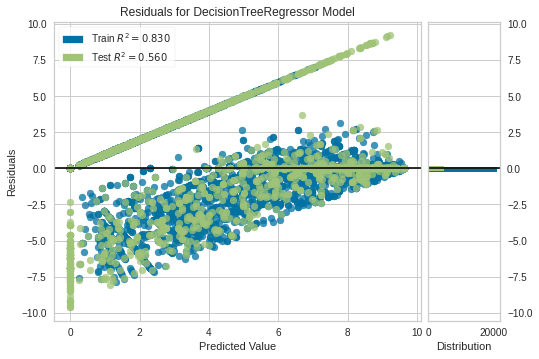

In [22]:
plot_model(model, plot='residuals', save=True, verbose=True)

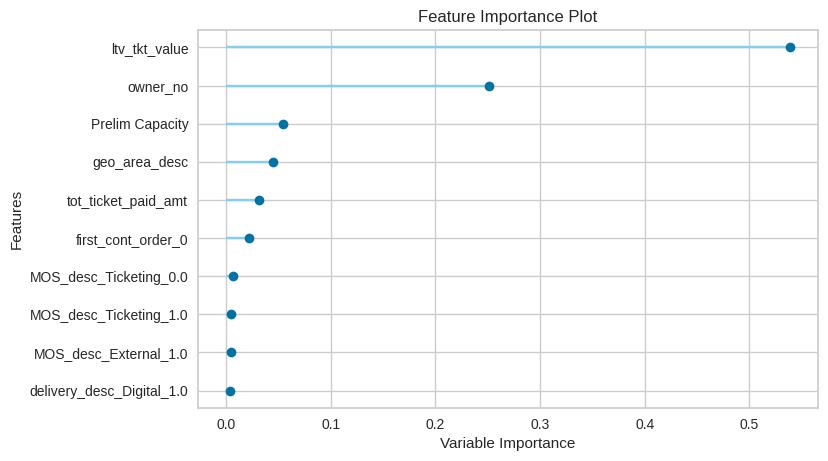

In [23]:
plot_model(model, plot='feature', save=True, verbose=True)

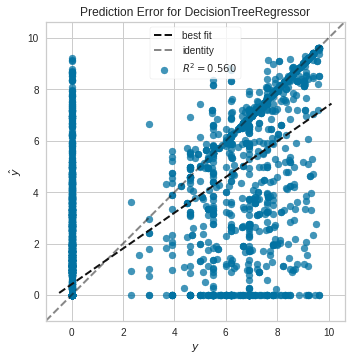

In [24]:
plot_model(model, plot='error', save=True, verbose=True)

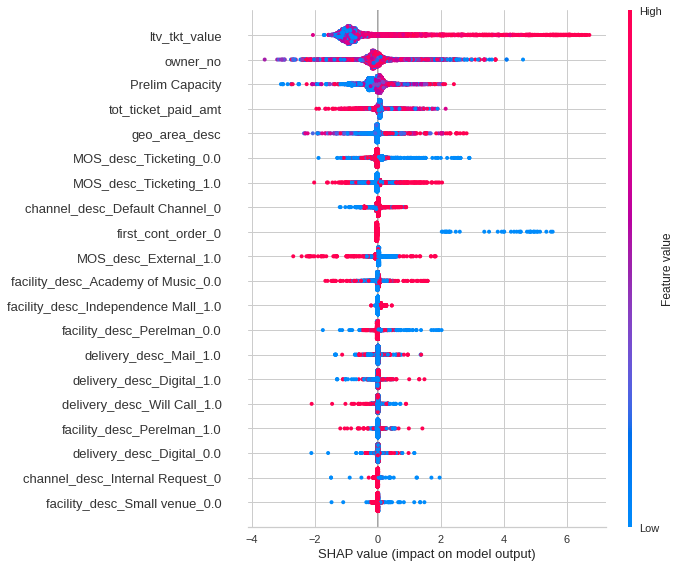

In [25]:
interpret_model(model)

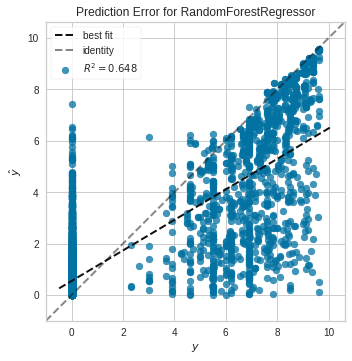

In [29]:
plot_model(model2, plot='error', save=True, verbose=True)

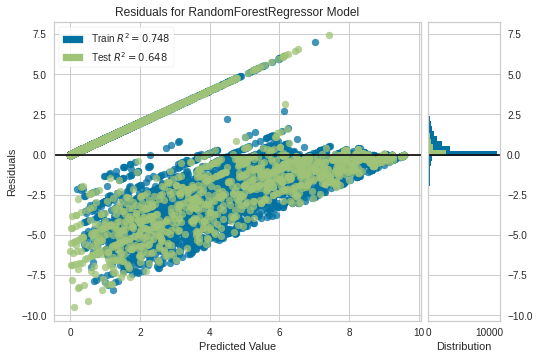

In [30]:
plot_model(model2, plot='residuals', save=True, verbose=True)

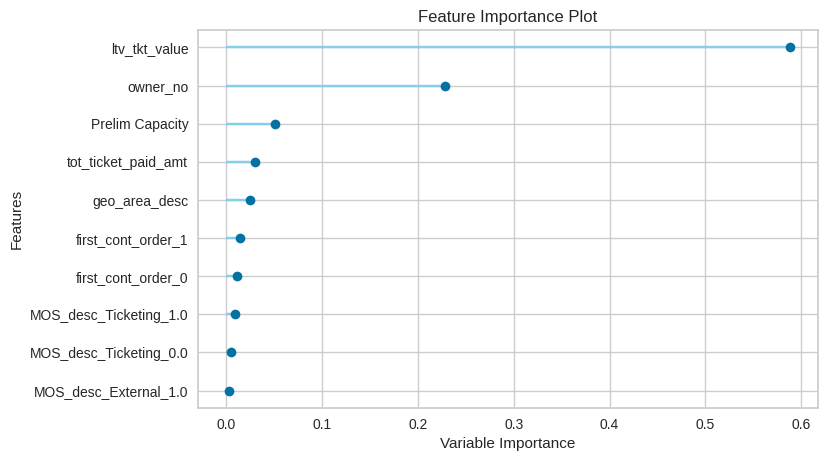

In [31]:
plot_model(model2, plot='feature', save=True, verbose=True)

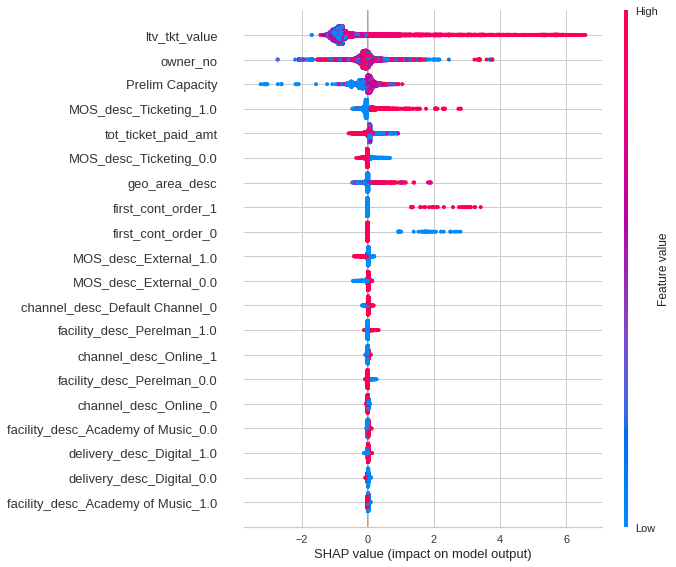

In [32]:
interpret_model(model2)

In [33]:
plot_model(model, plot='parameter', verbose=True, save=True)

,Parameters
ccp_alpha,0
criterion,mse
max_depth,23
max_features,60
max_leaf_nodes,None
min_impurity_decrease,0
min_impurity_split,None
min_samples_leaf,4
min_samples_split,2
min_weight_fraction_leaf,0


In [34]:
plot_model(model2, plot='parameter', verbose=True, save=True)

,Parameters
bootstrap,True
ccp_alpha,0
criterion,mse
max_depth,70
max_features,auto
max_leaf_nodes,None
max_samples,None
min_impurity_decrease,0
min_impurity_split,None
min_samples_leaf,9
